#  Exploratory Data Analysis of Ford GoBike Dataset 
## by Xiangning Bu

## [Wrangling and Cleaning](#wrangle)

## [Preliminary Data Exploration](#analysis)

- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#mul)


> This dataset includes information about individual rides made
in a bike-sharing system (Ford GoBike) covering the greater San Francisco
Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

This dataset includs 15 features with different data types: numerical and categorical variables, as well as timepoints variables; besides, the dataset contains geographic information and strings.

### What is/are the main feature(s) of interest in your dataset?

I am interested in usage of the bikes, trip time and differences in user population;\


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec, start_time, user_type, member_gender, station_names and stations_id 

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
df_miss= df[df['member_gender'].isnull()]
df_miss

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [9]:
df_miss.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,8265.000000,8263.000000,8265.000000,8265.000000,8263.000000,8265.000000,8265.000000,8265.000000,0.0
mean,1189.462311,129.873533,37.779896,-122.381453,128.725039,37.780311,-122.381260,4274.845856,NaN
std,3757.817740,114.156519,0.059241,0.077945,114.999428,0.059128,0.077762,1776.951111,NaN
min,62.000000,3.000000,37.317298,-122.453704,3.000000,37.326730,-122.453704,11.000000,NaN
25%,385.000000,43.000000,37.769757,-122.417385,41.500000,37.770083,-122.417385,3061.000000,NaN
50%,606.000000,90.000000,37.778742,-122.403234,90.000000,37.778768,-122.403234,4917.000000,NaN
75%,974.000000,197.000000,37.791300,-122.393170,196.500000,37.792251,-122.393170,5448.000000,NaN
max,85444.000000,398.000000,37.880222,-121.876613,388.000000,37.880222,-121.875926,6645.000000,NaN


In [10]:
len(df['start_station_id'].unique())

330

In [11]:
len(df['end_station_id'].unique())

330

<a id = 'wrangle'> </a>

## Data wrangle

1. Unindentified gender type in member_gender
2. Erroneous data types: 'start_time' and 'end_time' should be datetime,  'start_station_id' and 'end_station_id' should be string

## Data clean

**define**

1. Fill NULL gender type as Unknown
2. Convert 'start_time' and 'end_time'to datetime and extract the day of week 
3. Convert station_id to string

**code**

In [12]:
# convert to datatime type
df['start_time']= pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

In [13]:
# extract day of week from 'strat_time'
df['weekday'] = df['start_time'].dt.dayofweek

In [14]:
# Fill null value with 'Unknown' 

df['member_gender']=df['member_gender'].replace(np.nan,'Unknown', regex=True )

In [15]:
# remove the decimal, and convert start_station_id and end_station_id to str
df['start_station_id']=df['start_station_id'].astype(str).str.split('.').str[0]
df['end_station_id']= df.end_station_id.astype(str).str.split('.').str[0]


**Test**

In [16]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,3
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Unknown,No,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,4
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,4
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,4
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [18]:
df_unknown= df[df['member_gender']=='Unknown']
df_unknown

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Unknown,No,3
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252,Channing Way at Shattuck Ave,37.865847,-122.267443,244,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,Unknown,No,3
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258,University Ave at Oxford St,37.872355,-122.266447,263,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,Unknown,No,3
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,Unknown,No,3
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13,Commercial St at Montgomery St,37.794231,-122.402923,81,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,Unknown,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,Unknown,No,4
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368,Myrtle St at Polk St,37.785434,-122.419622,125,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,Unknown,No,4
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75,Market St at Franklin St,37.773793,-122.421239,133,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,Unknown,No,4
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58,Market St at 10th St,37.776619,-122.417385,75,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,Unknown,No,4


<a id = 'analysis'> </a>
<a id = 'uni'> </a>
## Univariate Exploration



###  What's the distribution of trip time? How long does the most trips take?

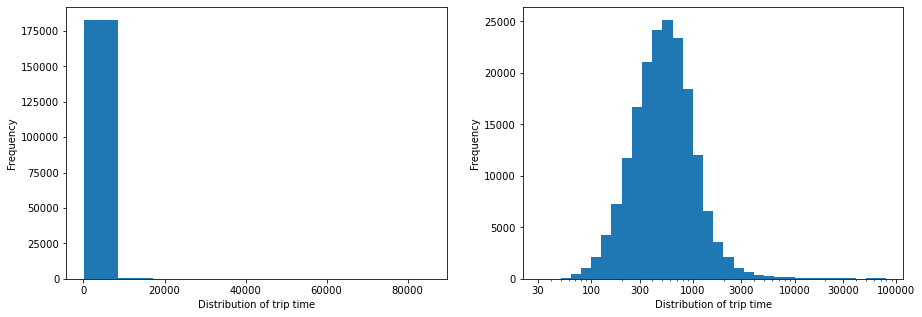

In [19]:
# Distribution of trip time 
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
plt.hist(data=df, x= 'duration_sec')
plt.xlabel('Distribution of trip time');
plt.ylabel('Frequency');

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(1.5, 5, 0.1)
ticks = [30, 100, 300, 1000,3000,10000,30000,100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df, x= 'duration_sec', bins= bins)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('Distribution of trip time')
plt.ylabel('Frequency');

Most of the ride time is between 100-3000 sec. However, the histogram is extremely skew to the right. \
It is necessary to plot again without outliers. 

In [20]:
# Identify and remove outliers 
Q1= df.duration_sec.quantile(0.25)
Q3= df.duration_sec.quantile(0.75)
IQR= Q3-Q1
upper_bound = Q1-1.5*IQR
lower_bound= Q3+1.5* IQR
# Q1, Q3,IQR, upper_bound, lower_bound

df2= df[(df['duration_sec']>upper_bound)&(df['duration_sec']<lower_bound )]
df2.to_csv('201902-fordgobike-tripdata-updated.csv')

In [21]:
df2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,3
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,3
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,3
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993.0,Male,No,3
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990.0,Male,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,4
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,4
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,4
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,4


In [22]:
# Distribution of trip time in df2

df2.duration_sec.max(), df2.duration_sec.min() 

(1502, 61)

### Does the histogram changed after removing outliers?

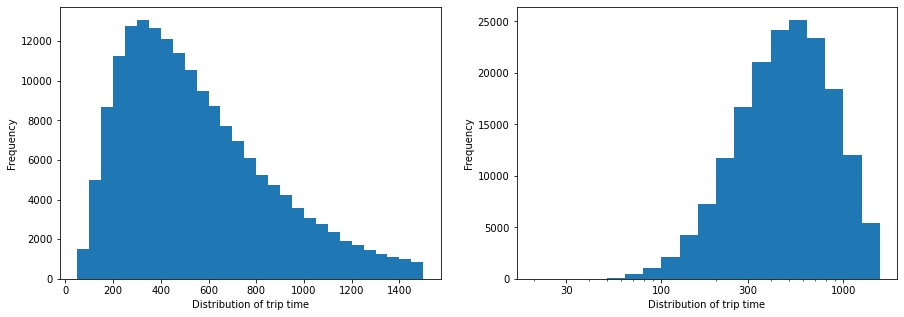

In [23]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
bin1= np.arange(50,1550, 50)
plt.hist(data=df2, x= 'duration_sec',bins= bin1)
plt.xlabel('Distribution of trip time')
plt.ylabel('Frequency');

plt.subplot(1, 2, 2)
bin2 = 10 ** np.arange(1.3, 3.3, 0.1)
ticks = [30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=df2, x= 'duration_sec', bins= bin2)
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('Distribution of trip time')
plt.ylabel('Frequency');

Most of the trip time is falling into range from 60 to 1500 sec.

### Are there any differences of ride frequency between user types?

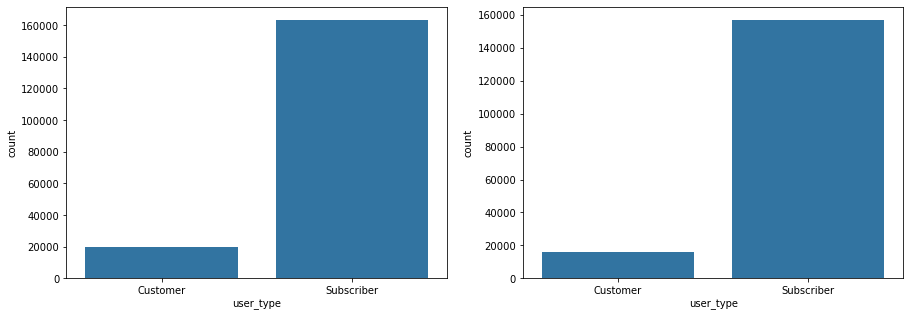

In [24]:
# user_type difference

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
color1 = sb.color_palette()[0]
orders= ['Customer','Subscriber']
sb.countplot(data= df, x= 'user_type', color = color1, order=orders);

plt.subplot(1, 2, 2)
color1 = sb.color_palette()[0]
orders= ['Customer','Subscriber']
sb.countplot(data= df2, x= 'user_type', color = color1,order=orders);

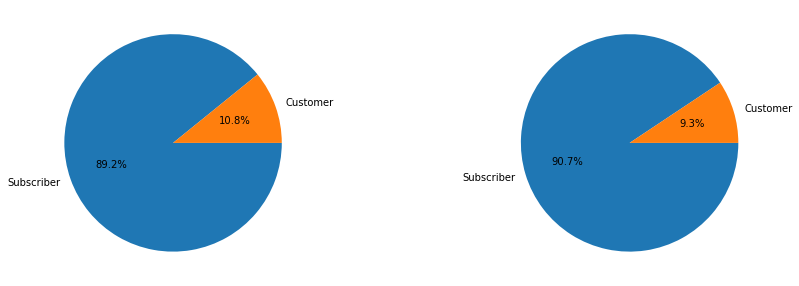

In [25]:
# Percentage of gender
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sorted_counts = df['user_type'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);

plt.subplot(1, 2, 2)
sorted_counts = df2['user_type'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);

Around 90% of users are subscribers, while only 10% are random customers.

### Are there any differences of ride frequency among genders?

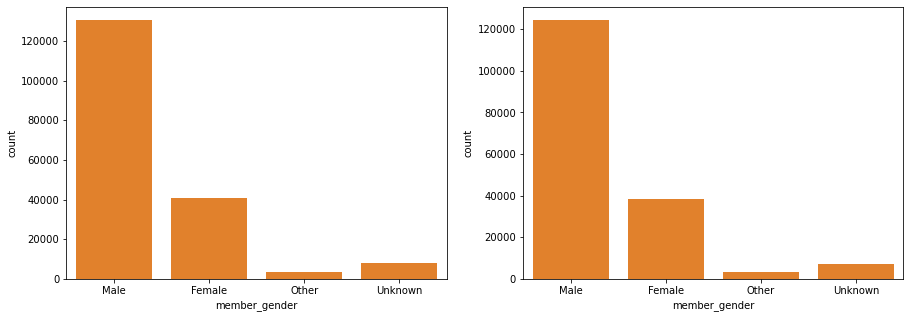

In [26]:
# gender difference

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
orders= ['Male','Female','Other','Unknown']
color2 = sb.color_palette()[1]
sb.countplot(data= df, x= 'member_gender',color=color2, order= orders);

plt.subplot(1, 2, 2)
orders= ['Male','Female','Other','Unknown']
color2 = sb.color_palette()[1]
sb.countplot(data= df2, x= 'member_gender',color=color2, order= orders);




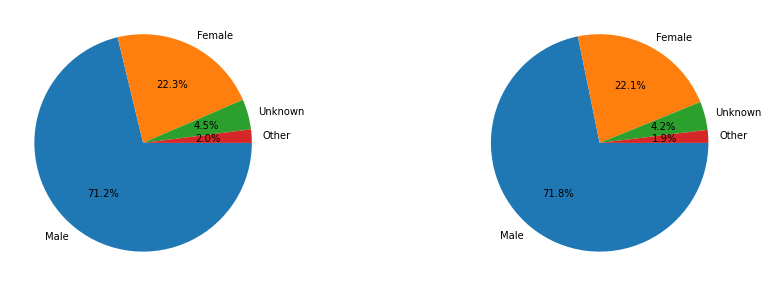

In [27]:
# Percentage of gender
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sorted_counts = df['member_gender'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);

plt.subplot(1, 2, 2)
sorted_counts = df2['member_gender'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%', startangle = 0, counterclock = False);

Most of the users are male (more than>70%).

### Are there any differences of ride frequency among each day of week?

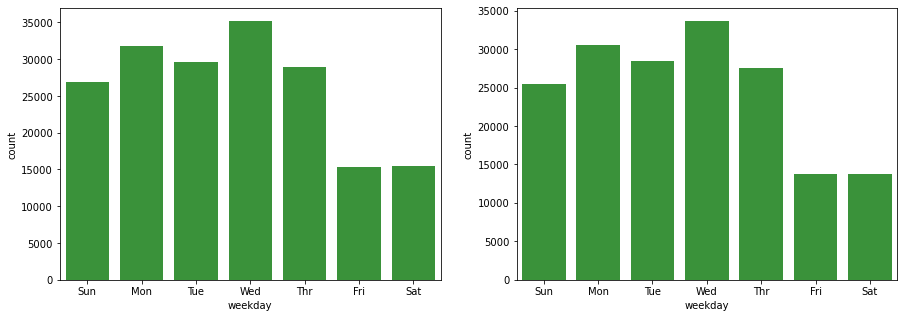

In [28]:
# Usage across everyday of week
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
color3 = sb.color_palette()[2]
sb.countplot(data= df, x= 'weekday', color = color3)
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label);

plt.subplot(1, 2, 2)
color3 = sb.color_palette()[2]
sb.countplot(data= df2, x= 'weekday', color = color3)
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label);

The bikes are used less in Fridays and Saturdays than other days. 

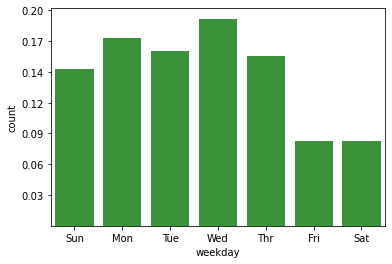

In [29]:
# yticks transformed to percentage

df2.shape[0]
yticks=[5000,10000,15000,20000,25000,30000,35000]

ylabel=[]
for x in yticks:
    x=x/df2.shape[0]
    ylabel.append(x) 
ylabel
    
ylabels = ['{:.2f}'.format (x) for x in ylabel ]

color3 = sb.color_palette()[2]
sb.countplot(data= df2, x= 'weekday', color = color3)
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label)
plt.yticks(yticks,ylabels);

### What are the names and their locations of  stations with the most bike usages?

In [30]:
df.start_station_id.value_counts()

58     3904
67     3544
81     3052
21     2895
3      2760
       ... 
301       9
51        7
224       4
300       4
344       2
Name: start_station_id, Length: 330, dtype: int64

In [31]:
df.end_station_id.value_counts()

67     4857
58     3973
21     3647
15     3368
3      2997
       ... 
51        9
300       7
344       6
224       6
301       5
Name: end_station_id, Length: 330, dtype: int64

In [32]:
# Top 10 start and end stations
top10_start= df.start_station_id.value_counts().nlargest(10).index
top10_end = df.end_station_id.value_counts().nlargest(10).index
(top10_start,top10_end)

(Index(['58', '67', '81', '21', '3', '15', '30', '5', '22', '16'], dtype='object'),
 Index(['67', '58', '21', '15', '3', '30', '81', '6', '5', '16'], dtype='object'))

In [33]:
df_top10_start = df[df['start_station_id'].isin(top10_start)]
df_top10_start.start_station_name.value_counts()
df_top10_start.to_csv('df_top10_start.csv')
df_top10_start.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 4th St)',
       'Howard St at Beale St', 'Berry St at 4th St'], dtype=object)

In [34]:
df_top10_end = df[df['end_station_id'].isin(top10_end)]
df_top10_end.end_station_name.value_counts()
df_top10_end.to_csv('df_top10_end.csv')

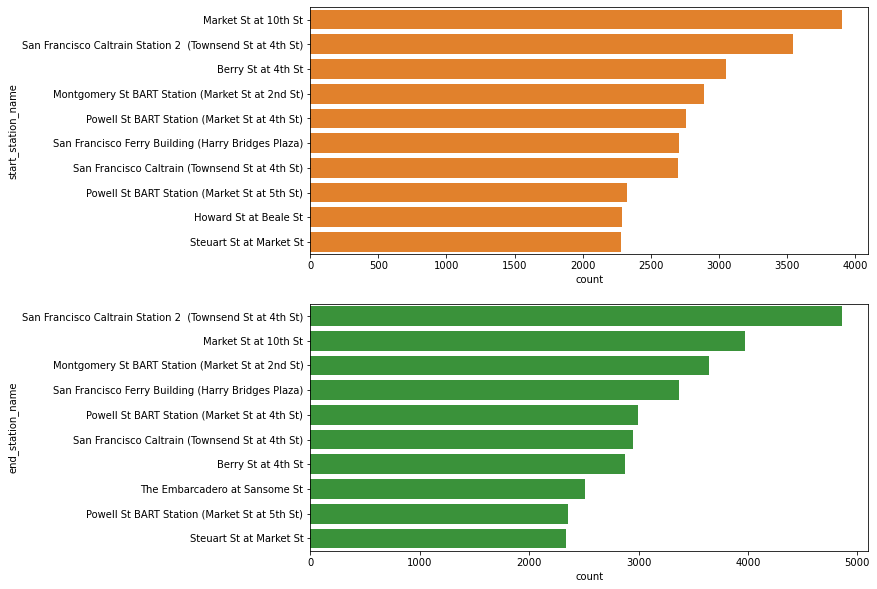

In [35]:
plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 1)
color2 = sb.color_palette()[1]
sb.countplot(data= df_top10_start, y= 'start_station_name',color=color2, order=df_top10_start.start_station_name.value_counts().index );

plt.subplot(2, 1, 2)
color3 = sb.color_palette()[2]
sb.countplot(data= df_top10_end, y= 'end_station_name',color=color3,order=df_top10_end.end_station_name.value_counts().index );

### Map of the top10 start  (blue) and end (red) stations on the greater San Francisco Bay area

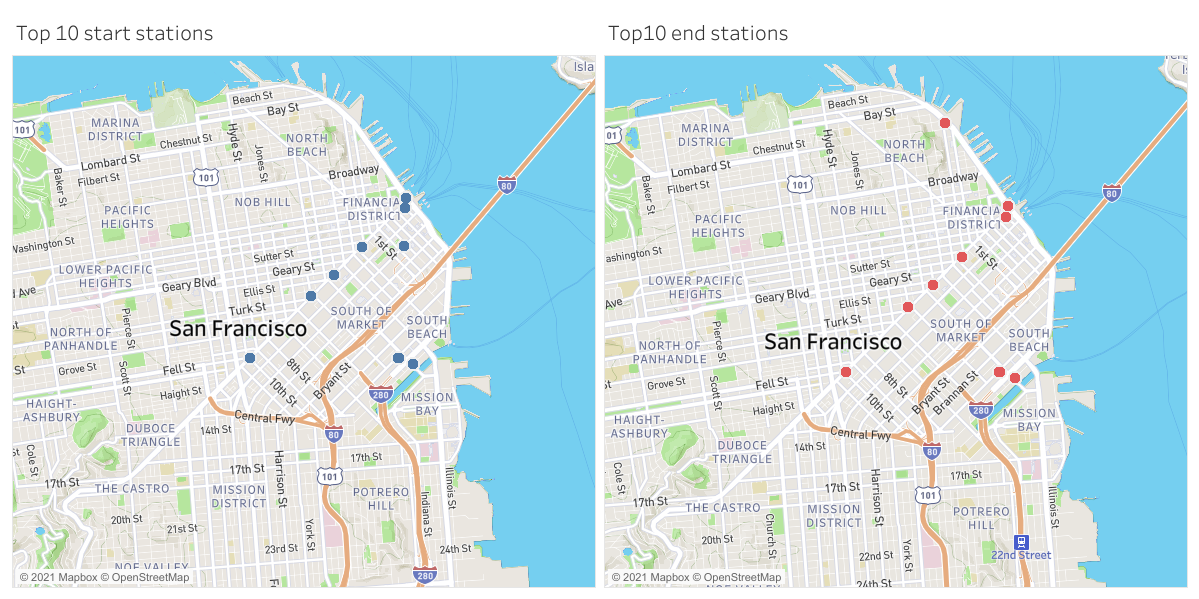

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip time distribution is skew to the right. Log transformation of x_scale  was performed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No tidiness issues found.

<a id = 'bi'> </a>
## Bivariate Exploration


### Are there any differences on average trip time between customers and subscribers?

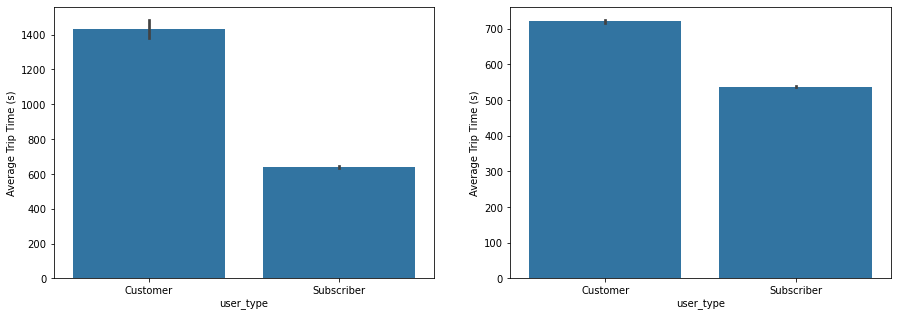

In [36]:
# Average trip time across users

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
color1 = sb.color_palette()[0]
orders= ['Customer','Subscriber']
sb.barplot(data=df, x= 'user_type', y= 'duration_sec', color=color1,order=orders);
plt.ylabel('Average Trip Time (s)')

plt.subplot(1, 2, 2)
color1 = sb.color_palette()[0]
orders= ['Customer','Subscriber']
sb.barplot(data=df2, x= 'user_type', y= 'duration_sec', color=color1,order=orders);
plt.ylabel('Average Trip Time (s)');







In [45]:
df.groupby('user_type').duration_sec.mean(), df2.groupby('user_type').duration_sec.mean(), 

(user_type
 Customer      1432.465019
 Subscriber     640.263678
 Name: duration_sec, dtype: float64,
 user_type
 Customer      719.851291
 Subscriber    536.635526
 Name: duration_sec, dtype: float64)

Customers have longer ride time than subscribers in average

### Are there any differences on average trip time among different genders?

C:\Users\xiangning\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


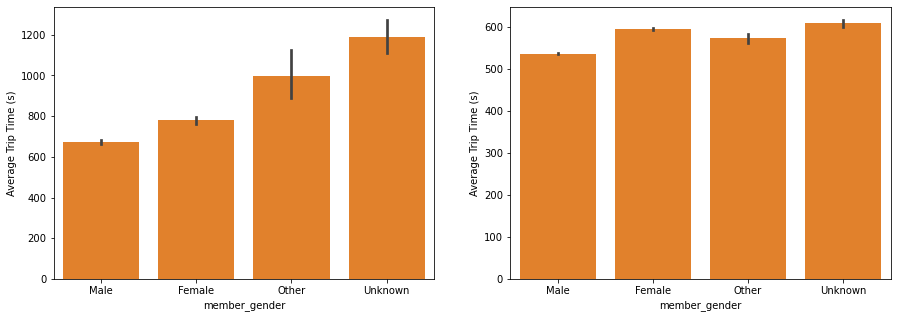

In [37]:
# Average trip time across gender
genders= ['Male','Female','Other','Unknown']
gender_order= pd.api.types.CategoricalDtype(ordered=True, categories= genders)
df['member_gender']=df['member_gender'].astype(gender_order);
df2['member_gender']=df2['member_gender'].astype(gender_order);

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df, x= 'member_gender', y= 'duration_sec', color=color2);
plt.ylabel('Average Trip Time (s)');

plt.subplot(1, 2, 2)
sb.barplot(data=df2, x= 'member_gender', y= 'duration_sec', color=color2)
plt.ylabel('Average Trip Time (s)');

In [44]:
df.groupby('member_gender').duration_sec.mean(), df2.groupby('member_gender').duration_sec.mean(), 

(member_gender
 Male        672.639069
 Female      779.070390
 Other       996.515334
 Unknown    1189.462311
 Name: duration_sec, dtype: float64,
 member_gender
 Male       537.117333
 Female     595.595138
 Other      573.339151
 Unknown    608.932375
 Name: duration_sec, dtype: float64)

Before removing outliers, male users have the shortest average trip time. However, the average ride times become similar among genders after removing the outliers.

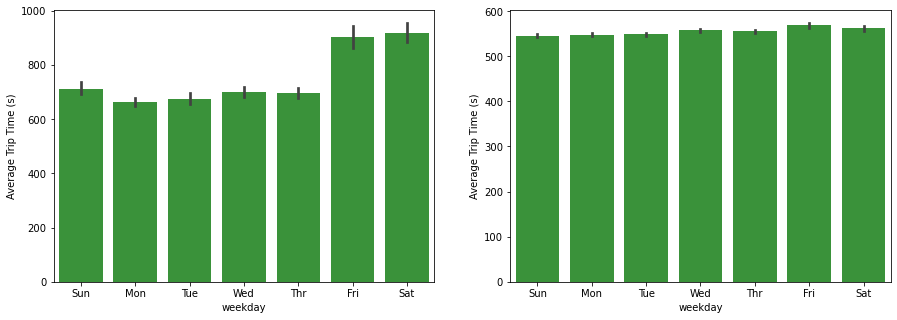

In [46]:
# 
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df, x= 'weekday', y= 'duration_sec', color=color3);
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label);
plt.ylabel('Average Trip Time (s)');

plt.subplot(1, 2, 2)
sb.barplot(data=df2, x= 'weekday', y= 'duration_sec', color=color3);
ticks=[0,1,2,3,4,5,6]
label=['Sun','Mon','Tue','Wed','Thr','Fri','Sat']
plt.xticks(ticks,label);
plt.ylabel('Average Trip Time (s)');

After remove outliers, the average trip time on every day of the week is similar.

### Who would like to ride bikes, male or female?

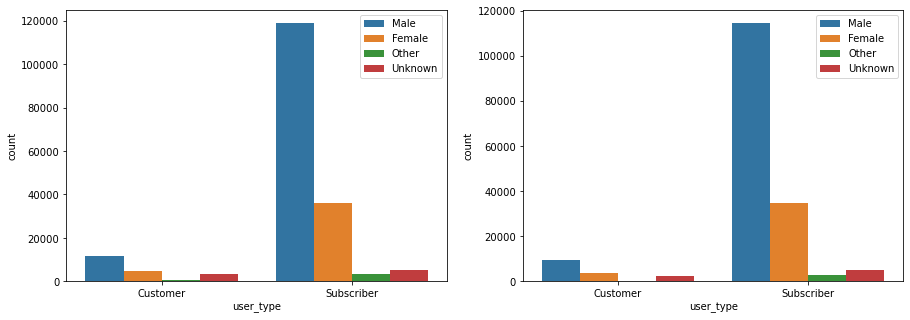

In [47]:
# Is there more female or male subscribers?

orders= ['Customer','Subscriber']
hue_orders=['Male','Female','Other','Unknown']

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.countplot(data= df, x= 'user_type', hue= 'member_gender', order=orders, hue_order=hue_orders);
plt.legend();


plt.subplot(1, 2, 2)
sb.countplot(data= df2, x= 'user_type', hue= 'member_gender', order=orders, hue_order=hue_orders);
plt.legend();

There are much more male users than female users in both user types.

I explored the relationship between average trip time across user_type, uers_gender and day of week.

After remove the outliers, customers still have longer average trip time than subscribers. However, there are almost no difference among genders and day of week. 

<a id = 'mul'> </a>
## Multivariate Exploration


### Average trip time analysis after beaking down by genders.

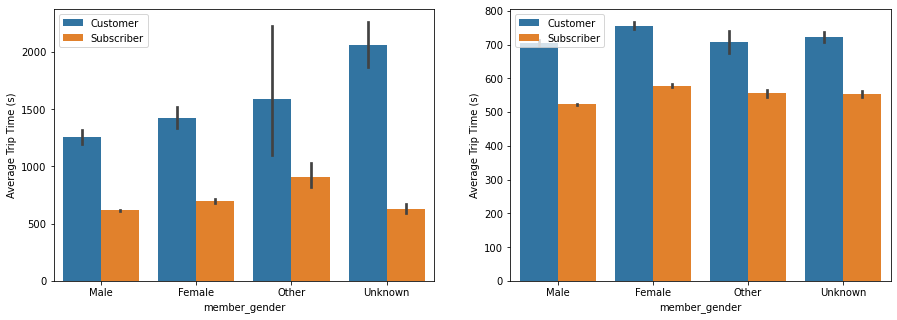

In [48]:

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df, x= 'member_gender', y= 'duration_sec', hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)');
plt.legend(loc='upper left');

plt.subplot(1, 2, 2)
sb.barplot(data=df2, x= 'member_gender', y= 'duration_sec',  hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)')
plt.legend(loc='upper left');

Customers have longer average trip time than subscribers in male, female and others.

### Average trip time analysis after beaking down by day of week.

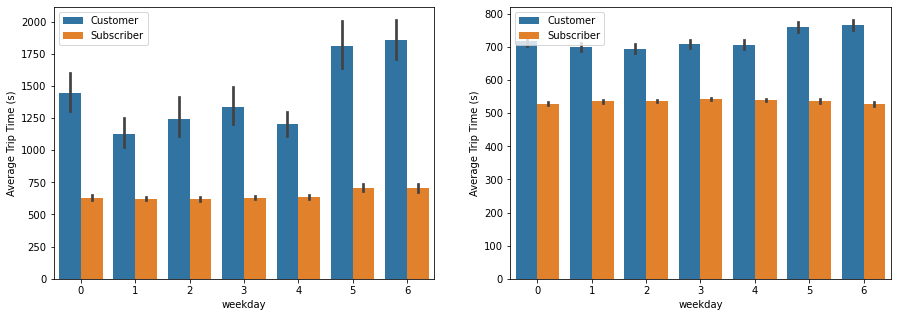

In [49]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df, x= 'weekday', y= 'duration_sec', hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)')
plt.legend(loc='upper left');

plt.subplot(1, 2, 2)
sb.barplot(data=df2, x= 'weekday', y= 'duration_sec', hue= 'user_type',hue_order=['Customer','Subscriber']);
plt.ylabel('Average Trip Time (s)')
plt.legend(loc='upper left');

Customers have longer average trip time than subscribers in every day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Breakdown by weekday and gender, customers still have longer trip time than subscribers.

### Were there any interesting or surprising interactions between features?

The average trip time become similar among genders and day of week after removing the outliers. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!